In [93]:
import numpy as np
import pandas as pd

import importlib

import preprocessing
importlib.reload(preprocessing)

data_runs = preprocessing.load_data()
data_runs_concat = pd.concat(data_runs, ignore_index=True)
data_runs_concat.head()
# dir(preprocessing)

,NC1,NC2,NC3,NC4,NC5,BF1,BF2,BF3,BF4,BF5,BF6,BF7,BF8,BF9,BF10,BF11,BF12,BF13,BF14,BF15,BF16,SL1,SL2,SL3,SL4,SR1,SR2,SR3,SR4,SL5,SL6,SL7,SL8,SL9,SR5,SR6,SR7,SR8,SR9
0,0.986975,0.914239,0.939930,0.981296,0.957198,-0.285199,-0.302871,-0.277568,-0.252033,-0.302303,-0.281130,-0.255106,-0.253767,-0.410652,-0.421946,-0.405291,-0.366362,-0.351364,-0.365464,-0.362496,-0.343676,-0.240988,-0.226928,-0.221270,-0.224137,-0.264728,-0.242831,-0.224514,-0.213234,-0.204119,-0.194805,-0.196025,-0.229057,-0.300985,-0.223587,-0.205809,-0.207572,-0.242566,-0.313782
1,0.982099,0.910677,0.936324,0.975822,0.954731,-0.297165,-0.296702,-0.269440,-0.288853,-0.338363,-0.339646,-0.300767,-0.303833,-0.380030,-0.362205,-0.333981,-0.361413,-0.351582,-0.365036,-0.356083,-0.332245,-0.242018,-0.231027,-0.226514,-0.227960,-0.260137,-0.240138,-0.222403,-0.213588,-0.203880,-0.196793,-0.195795,-0.234400,-0.298460,-0.223325,-0.204458,-0.208421,-0.240080,-0.320067
2,0.981479,0.912423,0.936251,0.972097,0.950690,-0.289024,-0.295124,-0.274944,-0.282493,-0.310772,-0.293027,-0.292049,-0.312768,-0.362571,-0.362876,-0.365998,-0.364480,-0.345786,-0.348343,-0.354479,-0.352806,-0.240923,-0.228234,-0.226887,-0.230781,-0.262407,-0.242380,-0.225217,-0.215172,-0.205548,-0.199560,-0.201897,-0.237236,-0.303589,-0.223848,-0.206127,-0.210116,-0.238507,-0.311953
3,0.984010,0.911266,0.937581,0.978330,0.954849,-0.248833,-0.254865,-0.270877,-0.284804,-0.294314,-0.271148,-0.278265,-0.297322,-0.379055,-0.385430,-0.385521,-0.383656,-0.327902,-0.330295,-0.339620,-0.343505,-0.226986,-0.218116,-0.215734,-0.221885,-0.251849,-0.234403,-0.220770,-0.210800,-0.206539,-0.192789,-0.198444,-0.228108,-0.287099,-0.221425,-0.203784,-0.206720,-0.242780,-0.319539
4,0.983990,0.911159,0.938763,0.982019,0.954798,-0.250957,-0.253142,-0.288703,-0.292556,-0.280229,-0.275785,-0.282404,-0.292907,-0.384572,-0.403301,-0.414975,-0.394384,-0.331400,-0.344021,-0.345235,-0.336674,-0.234385,-0.223958,-0.220264,-0.223356,-0.255807,-0.237100,-0.218542,-0.208006,-0.206879,-0.192007,-0.193210,-0.228463,-0.297362,-0.222896,-0.201899,-0.203805,-0.236546,-0.308906


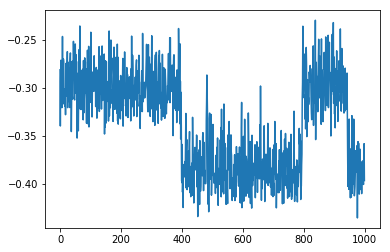

In [72]:
import matplotlib.pyplot as plt
# plt.plot(data_runs_concat)
plt.plot(data_runs[0].loc[:, 'BF6'])
# plt.plot(data_runs[0].loc[:, 'BF10'])
plt.show()

In [79]:
from sklearn import linear_model
model = linear_model.LinearRegression()

In [553]:
# Predict BF6 using all other ports
data_1 = data_runs[0]
training_X_1 = data_1.iloc[:800, :].drop(labels='BF6', axis='columns')
training_y_1 = data_1.iloc[:800, :].loc[:, 'BF6']
testing_X_1 = data_1.iloc[800:, :].drop(labels='BF6', axis='columns')
testing_y_1 = data_1.iloc[800:, :].loc[:, 'BF6']
model.fit(training_X_1, training_y_1)
print(model.score(training_X_1, training_y_1))
print(model.score(testing_X_1, testing_y_1))

0.9479609100556468
0.91120926768618


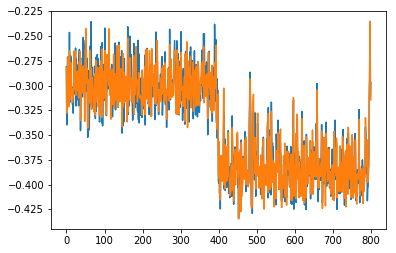

In [507]:
import matplotlib.pyplot as plt
plt.plot(np.arange(800), training_y_1)
prediction = model.predict(training_X_1)
plt.plot(np.arange(800), prediction)
plt.show()

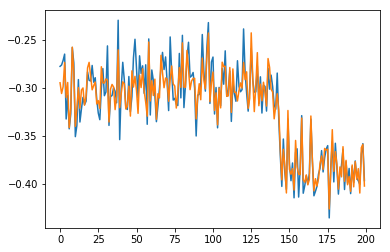

In [509]:
plt.plot(np.arange(200), testing_y_1)
prediction = model.predict(testing_X_1)
plt.plot(np.arange(200), prediction)
plt.show()

In [124]:
# Predict BF6 using all front and side ports
data_2 = data_runs[0]
dropped_labels_2 = ['BF1', 'BF2', 'BF3', 'BF4', 'BF5', 'BF6', 'BF7', 'BF8', 'BF9', 'BF10', 'BF11', 'BF12', 'BF13', 'BF14', 'BF15', 'BF16']
training_X_2 = data_2.iloc[:800, :].drop(labels=dropped_labels_2, axis='columns')
training_y_2 = data_2.iloc[:800, :].loc[:, 'BF6']
testing_X_2 = data_2.iloc[800:, :].drop(labels=dropped_labels_2, axis='columns')
testing_y_2 = data_2.iloc[800:, :].loc[:, 'BF6']
model.fit(training_X_2, training_y_2)
print(model.score(training_X_2, training_y_2))
print(model.score(testing_X_2, testing_y_2))

0.801486588782743
0.6657275895325129


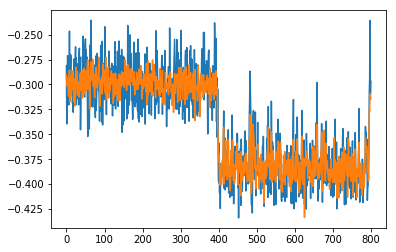

In [524]:
plt.plot(np.arange(800), training_y_2)
prediction = model.predict(training_X_2)
plt.plot(np.arange(800), prediction)
plt.show()

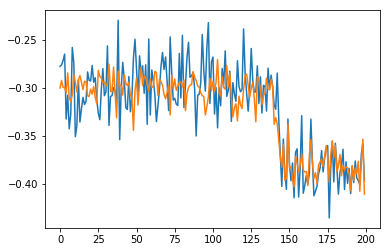

In [125]:
plt.plot(np.arange(200), testing_y_2)
prediction = model.predict(testing_X_2)
plt.plot(np.arange(200), prediction)
plt.show()

In [550]:
# Predict back ports average using all front and side ports
data_3 = data_runs[0]
dropped_labels_3 = ['BF1', 'BF2', 'BF3', 'BF4', 'BF5', 'BF6', 'BF7', 'BF8', 'BF9', 'BF10', 'BF11', 'BF12', 'BF13', 'BF14', 'BF15', 'BF16']
training_X_3 = data_3.iloc[:800, :].drop(labels=dropped_labels_3, axis='columns')
training_y_3 = data_3.iloc[:800, :].loc[:, 'BF1':'BF16'].mean(axis='columns')
testing_X_3 = data_3.iloc[800:, :].drop(labels=dropped_labels_3, axis='columns')
testing_y_3 = data_3.iloc[800:, :].loc[:, 'BF1':'BF16'].mean(axis='columns')
model.fit(training_X_3, training_y_3)
print(model.score(training_X_3, training_y_3))
print(model.score(testing_X_3, testing_y_3))

0.19863830054622367
0.11256895483651685


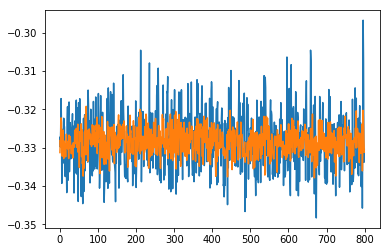

In [551]:
plt.plot(np.arange(800), training_y_3)
prediction = model.predict(training_X_3)
plt.plot(np.arange(800), prediction)
plt.show()

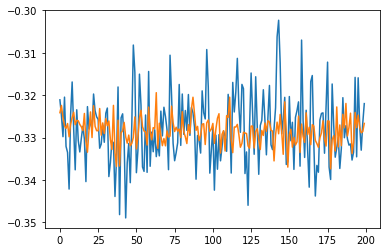

In [552]:
plt.plot(np.arange(200), testing_y_3)
prediction = model.predict(testing_X_3)
plt.plot(np.arange(200), prediction)
plt.show()

In [120]:
# Predict every 5th BF6 sample using prev 5 front and side port samples

# data_4 = data_runs[0]
data_4 = data_runs_concat
dropped_labels_4 = ['BF1', 'BF2', 'BF3', 'BF4', 'BF5', 'BF6', 'BF7', 'BF8', 'BF9', 'BF10', 'BF11', 'BF12', 'BF13', 'BF14', 'BF15', 'BF16']
X_4_initial = data_4.drop(labels=dropped_labels_4, axis='columns')
y_4_initial = data_4.loc[:, 'BF6']
# X_4 = pd.DataFrame()
# y_4 = pd.DataFrame()

# for i in range(0, 1000, 5):
#     X_4_row = pd.Series(X_4_initial.iloc[i:i+5, :].values.flatten())
#     X_4 = X_4.append(X_4_row, ignore_index=True)
#     y_4 = y_4.append(pd.Series(y_4_initial.iloc[i+4]), ignore_index=True)

X_4, y_4 = preprocessing.merge_rows(X_4_initial, y_4_initial, 5)

training_X_4 = X_4.iloc[:3000, :]
training_y_4 = y_4.iloc[:3000, :]
testing_X_4 = X_4.iloc[3000:, :]
testing_y_4 = y_4.iloc[3000:, :]
model.fit(training_X_4, training_y_4)
print(model.score(training_X_4, training_y_4))
print(model.score(testing_X_4, testing_y_4))
print(X_4.shape)

0.8057679992457067
0.23149540163300183
(3400, 115)


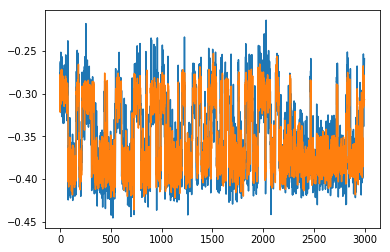

In [122]:
plt.plot(np.arange(training_y_4.size), training_y_4)
prediction = model.predict(training_X_4)
plt.plot(np.arange(prediction.size), prediction)
plt.show()

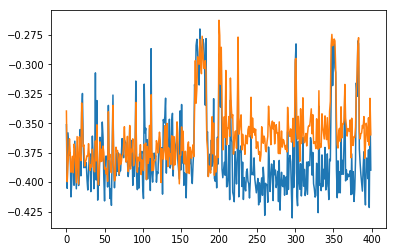

In [123]:
plt.plot(np.arange(testing_y_4.size), testing_y_4)
prediction = model.predict(testing_X_4)
plt.plot(np.arange(prediction.size), prediction)
plt.show()